# Titanic Dataset

### Importing necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline


import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

# Libraries to build decision tree classifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
# To get different metric scores
#from sklearn import metrics
#from sklearn.metrics import (
#    f1_score,
#    roc_curve,
#    roc_auc_score,
#    accuracy_score,
#    recall_score,
#    precision_score,
#    confusion_matrix,
#    plot_confusion_matrix,
#    make_scorer,
#    silhouette_score,
#)

### Loading Training Dataset

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age and Cabin have missing values so I will have to deal with that before training the model

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Calculate average age for each name prefix
average_age_by_prefix = train_data.groupby(train_data['Name'].str.extract(' ([A-Za-z]+)\.')[0])['Age'].mean()

# Function to fill NaN age values using the average age based on the name prefix
def fill_age(row):
    if pd.isnull(row['Age']):
        prefix = row['Name'].split(',')[1].split('.')[0].strip()
        return average_age_by_prefix.get(prefix, train_data['Age'].mean())
    return row['Age']

# Apply the function to fill NaN age values
train_data['Age'] = train_data.apply(fill_age, axis=1)

# Now the 'Age' column should be filled with the average age based on the name prefix

In [6]:
average_age_by_prefix

0
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [7]:
train_data.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
x ="O'Donoghue, Ms. Bridget"
yy = x.split(',')[1].split('.')[0].strip()
print(yy)

Ms


In [10]:
# NEXT THING I NEED TO WORK ON "AGE BINS"

# Define the bin edges for the age groups
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Define the labels for the age groups
bin_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'Age_Group' that contains the age groups
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Now the 'Age_Group' column will contain the age groups ranging from 1 to 80

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40


In [12]:
##loading the data that our model will test

test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
# Calculate average age for each name prefix

# Function to fill NaN age values using the average age based on the name prefix
def fill_age(row):
    if pd.isnull(row['Age']):
        prefix = row['Name'].split(',')[1].split('.')[0].strip()
        return average_age_by_prefix.get(prefix, test_data['Age'].mean())
    return row['Age']

# Apply the function to fill NaN age values
test_data['Age'] = test_data.apply(fill_age, axis=1)

# Now the 'Age' column should be filled with the average age based on the name prefixb

In [14]:
# Define the bin edges for the age groups
#bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Define the labels for the age groups
#bin_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'Age_Group' that contains the age groups
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Now the 'Age_Group' column will contain the age groups ranging from 1 to 80

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  Age_Group    418 non-null    category
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 36.8+ KB


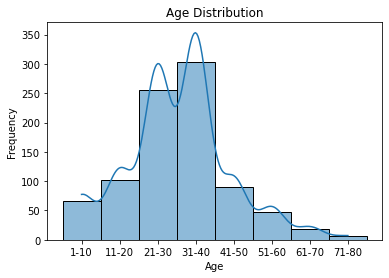

In [16]:
# Create a histogram
sns.histplot(data=train_data, x='Age_Group', kde=True)  # Set kde=True to add a kernel density estimate
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

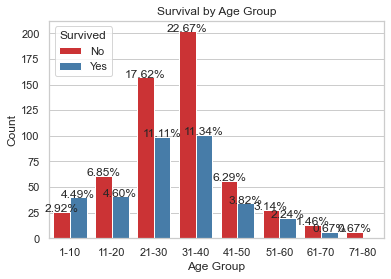

In [17]:

# Create a bar plot
sns.set(style="whitegrid")  # Set a white grid background (optional)
ax = sns.countplot(data=train_data, x='Age_Group', hue='Survived', palette='Set1')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Add percentage labels
total = len(train_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

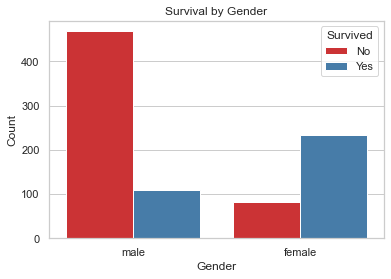

In [18]:
# Create a bar plot
sns.set(style="whitegrid")  # Set a white grid background (optional)
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [19]:
#display(water)

In [20]:
##splitting the data into X & Y to train our model

y = train_data["Survived"]

features = ["Pclass", "Sex","SibSp", "Parch", "Age_Group"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

##generating the model

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

##model was fit onto training data and now i can predict who survived on the test data

predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

In [21]:
#feature_names = list(X_test.columns)
#print(feature_names)

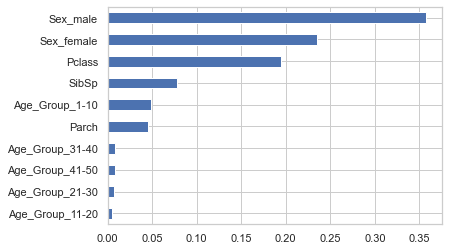

In [22]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')).invert_yaxis()  

In [23]:
# Imortance features, we see that we have many items meaning we should prune the tree
print (pd.DataFrame(model.feature_importances_, columns = ["Feat_Importance"], index = X.columns).sort_values(by = 'Feat_Importance', ascending = False))

                 Feat_Importance
Sex_male                0.358030
Sex_female              0.235519
Pclass                  0.194368
SibSp                   0.078249
Age_Group_1-10          0.048821
Parch                   0.045547
Age_Group_31-40         0.008586
Age_Group_41-50         0.008170
Age_Group_21-30         0.007151
Age_Group_11-20         0.005512
Age_Group_51-60         0.004440
Age_Group_61-70         0.004090
Age_Group_71-80         0.001517


In [24]:
##This is the output of the model and the prediction for the test data set!
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
##looks like 157 survived and 261 died according to the prediction
output['Survived'].value_counts()

0    261
1    157
Name: Survived, dtype: int64